In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['nuevitas',
 'kapaa',
 'busselton',
 'novokizhinginsk',
 'bay roberts',
 'kahului',
 'hilo',
 'yellowknife',
 'wajima',
 'camana',
 'logan',
 'bluff',
 'ushuaia',
 'dingle',
 'atuona',
 'attawapiskat',
 'vaini',
 'lebu',
 'bardiyah',
 'georgetown',
 'albany',
 'port blair',
 'hualmay',
 'klaksvik',
 'vaitupu',
 'novo aripuana',
 'flinders',
 'pevek',
 'thompson',
 'taolanaro',
 'whitehorse',
 'mahebourg',
 'hinton',
 'kodiak',
 'punta arenas',
 'rikitea',
 'ancud',
 'chiredzi',
 'muriwai beach',
 'chokurdakh',
 'mys shmidta',
 'weihe',
 'hermanus',
 'gorontalo',
 'victoria',
 'yulara',
 'saint-philippe',
 'puerto el triunfo',
 'ler',
 'itagi',
 'barinitas',
 'khatanga',
 'richards bay',
 'mocambique',
 'sapucaia',
 'xichang',
 'tiksi',
 'tasiilaq',
 'buala',
 'the valley',
 'seminole',
 'torbay',
 'dickinson',
 'portree',
 'dikson',
 'tsihombe',
 'fairbanks',
 'marcona',
 'kununurra',
 'mount isa',
 'tambo grande',
 'hambantota',
 'puerto ayora',
 'isangel',
 'taoudenni',
 'ngukurr',


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuevitas
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | novokizhinginsk
Processing Record 5 of Set 1 | bay roberts
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | wajima
Processing Record 10 of Set 1 | camana
Processing Record 11 of Set 1 | logan
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | bardiyah
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | port blair
Processing Record 23 of Set 1

Processing Record 35 of Set 4 | poronaysk
Processing Record 36 of Set 4 | annaka
Processing Record 37 of Set 4 | olafsvik
Processing Record 38 of Set 4 | manaure
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | honiara
Processing Record 42 of Set 4 | maltahohe
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | nizwa
Processing Record 45 of Set 4 | suntar
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | saquena
Processing Record 48 of Set 4 | kananga
Processing Record 49 of Set 4 | hami
Processing Record 50 of Set 4 | nyimba
Processing Record 1 of Set 5 | popondetta
Processing Record 2 of Set 5 | pombas
Processing Record 3 of Set 5 | mao
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | arlit
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | pochutl

Processing Record 27 of Set 8 | gornja radgona
Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | tromso
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | pilar
Processing Record 34 of Set 8 | zhaoqing
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | sohag
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | yerbogachen
Processing Record 39 of Set 8 | talavera de la reina
Processing Record 40 of Set 8 | ossora
Processing Record 41 of Set 8 | keti bandar
Processing Record 42 of Set 8 | kainantu
Processing Record 43 of Set 8 | izumo
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | jatiroto
Processing Record 46 of Set 8 | vikhorevka
Processing Record 47 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 8 | kralendijk
Processing Record 49 of Set 8 | yiyang
Processing

Processing Record 19 of Set 12 | kawalu
Processing Record 20 of Set 12 | loandjili
Processing Record 21 of Set 12 | pinheiral
Processing Record 22 of Set 12 | salekhard
Processing Record 23 of Set 12 | kibala
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | acajutla
Processing Record 26 of Set 12 | lavrentiya
Processing Record 27 of Set 12 | uusikaupunki
Processing Record 28 of Set 12 | tazovskiy
Processing Record 29 of Set 12 | mabaruma
Processing Record 30 of Set 12 | val-david
Processing Record 31 of Set 12 | blonduos
City not found. Skipping...
Processing Record 32 of Set 12 | gunjur
Processing Record 33 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 34 of Set 12 | neryungri
Processing Record 35 of Set 12 | ruteng
Processing Record 36 of Set 12 | nemuro
Processing Record 37 of Set 12 | santa cruz
Processing Record 38 of Set 12 | oktyabrskoye
Processing Record 39 of Set 12 | kokopo
Processing Record 40 of Set 12 | zyryanka
Processing Rec

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuevitas,21.5453,-77.2644,90.30,58,6,10.29,CU,2021-07-21 17:57:42
1,Kapaa,22.0752,-159.3190,78.78,83,89,4.00,US,2021-07-21 17:57:43
2,Busselton,-33.6500,115.3333,52.05,82,85,7.65,AU,2021-07-21 17:57:43
3,Novokizhinginsk,51.6115,109.5917,57.56,99,100,2.73,RU,2021-07-21 17:57:43
4,Bay Roberts,47.5999,-53.2648,59.02,95,100,8.01,CA,2021-07-21 17:56:44
5,Kahului,20.8947,-156.4700,74.97,89,97,11.34,US,2021-07-21 17:54:20
6,Hilo,19.7297,-155.0900,80.28,94,90,8.05,US,2021-07-21 17:57:44
7,Yellowknife,62.4560,-114.3525,68.29,77,75,3.00,CA,2021-07-21 17:57:44
8,Wajima,37.4000,136.9000,77.47,89,2,6.64,JP,2021-07-21 17:57:45
9,Camana,-16.6228,-72.7111,66.25,69,16,6.58,PE,2021-07-21 17:57:45


In [14]:
new_column_order = ["","City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
#new_column_order = ["City","Lat","Lng"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuevitas,CU,2021-07-21 17:57:42,21.5453,-77.2644,90.30,58,6,10.29
1,Kapaa,US,2021-07-21 17:57:43,22.0752,-159.3190,78.78,83,89,4.00
2,Busselton,AU,2021-07-21 17:57:43,-33.6500,115.3333,52.05,82,85,7.65
3,Novokizhinginsk,RU,2021-07-21 17:57:43,51.6115,109.5917,57.56,99,100,2.73
4,Bay Roberts,CA,2021-07-21 17:56:44,47.5999,-53.2648,59.02,95,100,8.01
...,...,...,...,...,...,...,...,...,...
571,Carballo,ES,2021-07-21 18:00:57,43.2130,-8.6910,77.58,91,65,5.26
572,Shediac,CA,2021-07-21 18:00:58,46.2198,-64.5411,71.10,100,90,6.91
573,Timbiqui,CO,2021-07-21 18:00:58,2.7717,-77.6654,84.36,74,69,8.21
574,Otradnoye,RU,2021-07-21 18:00:58,59.7775,30.8181,65.17,52,58,7.45


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

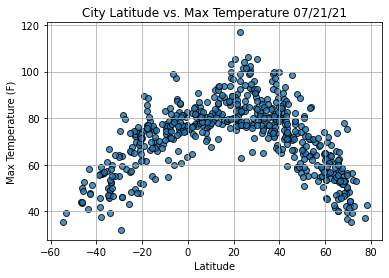

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

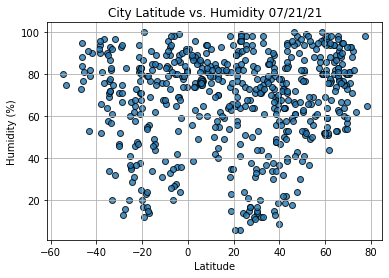

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

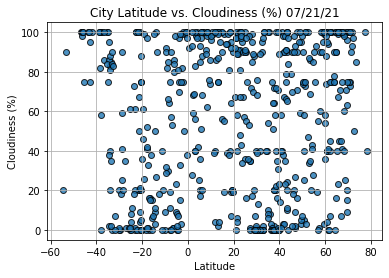

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

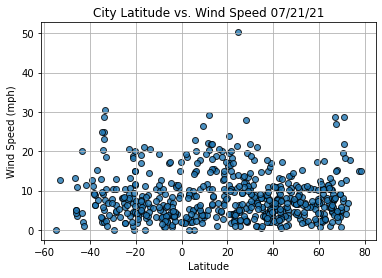

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
'''Create a function to create perform linear regression on the weather data
and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)'''


# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(r_value)
    plt.show()
    

In [31]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        576 non-null    object 
 1   Country     576 non-null    object 
 2   Date        576 non-null    object 
 3   Lat         576 non-null    float64
 4   Lng         576 non-null    float64
 5   Max Temp    576 non-null    float64
 6   Humidity    576 non-null    int64  
 7   Cloudiness  576 non-null    int64  
 8   Wind Speed  576 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 40.6+ KB


In [24]:
index13 = city_data_df.loc[13]
index13

City                       Dingle
Country                        PH
Date          2021-07-21 17:57:46
Lat                       10.9995
Lng                      122.6711
Max Temp                    78.57
Humidity                       79
Cloudiness                     99
Wind Speed                  11.77
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
571     True
572     True
573     True
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuevitas,CU,2021-07-21 17:57:42,21.5453,-77.2644,90.30,58,6,10.29
1,Kapaa,US,2021-07-21 17:57:43,22.0752,-159.3190,78.78,83,89,4.00
3,Novokizhinginsk,RU,2021-07-21 17:57:43,51.6115,109.5917,57.56,99,100,2.73
4,Bay Roberts,CA,2021-07-21 17:56:44,47.5999,-53.2648,59.02,95,100,8.01
5,Kahului,US,2021-07-21 17:54:20,20.8947,-156.4700,74.97,89,97,11.34
...,...,...,...,...,...,...,...,...,...
571,Carballo,ES,2021-07-21 18:00:57,43.2130,-8.6910,77.58,91,65,5.26
572,Shediac,CA,2021-07-21 18:00:58,46.2198,-64.5411,71.10,100,90,6.91
573,Timbiqui,CO,2021-07-21 18:00:58,2.7717,-77.6654,84.36,74,69,8.21
574,Otradnoye,RU,2021-07-21 18:00:58,59.7775,30.8181,65.17,52,58,7.45


In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuevitas,CU,2021-07-21 17:57:42,21.5453,-77.2644,90.30,58,6,10.29
1,Kapaa,US,2021-07-21 17:57:43,22.0752,-159.3190,78.78,83,89,4.00
3,Novokizhinginsk,RU,2021-07-21 17:57:43,51.6115,109.5917,57.56,99,100,2.73
4,Bay Roberts,CA,2021-07-21 17:56:44,47.5999,-53.2648,59.02,95,100,8.01
5,Kahului,US,2021-07-21 17:54:20,20.8947,-156.4700,74.97,89,97,11.34


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.7059931589047974


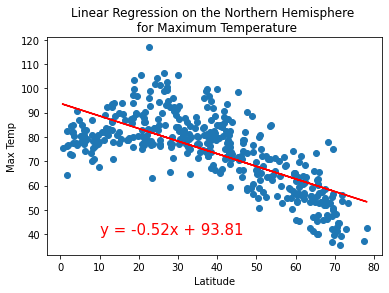

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

0.7602904776142148


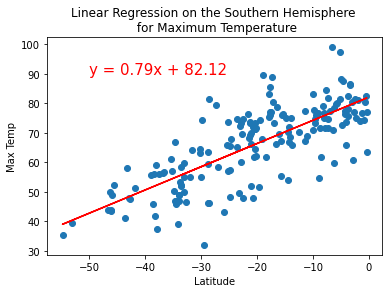

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

0.10035825368942565


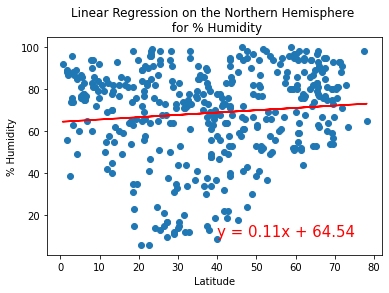

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

-0.07395687970468738


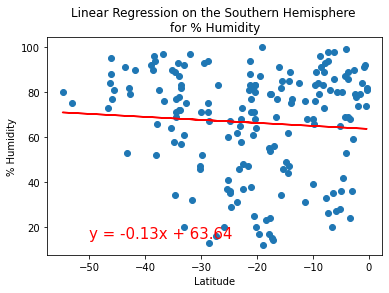

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

-0.014683421085154469


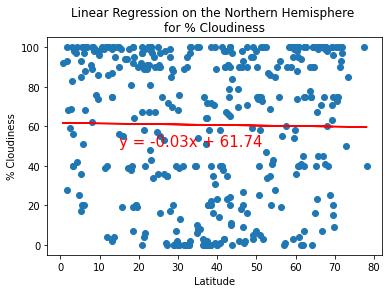

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(15,50))

-0.16092705961496523


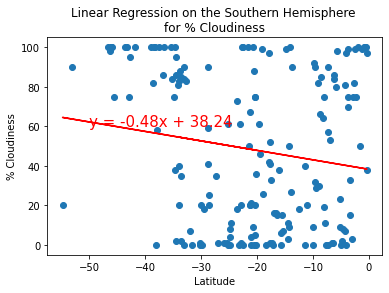

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

-0.11076037085129344


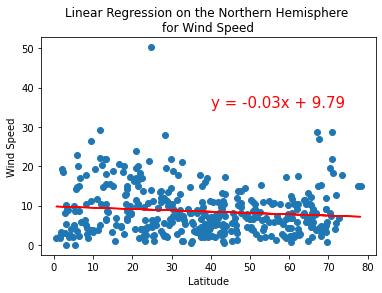

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

-0.13437245454800784


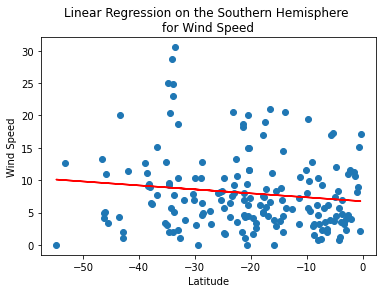

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [68]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Nuevitas,CU,2021-07-21 17:57:42,21.5453,-77.2644,90.30,58,6,10.29
1,1,Kapaa,US,2021-07-21 17:57:43,22.0752,-159.3190,78.78,83,89,4.00
2,2,Busselton,AU,2021-07-21 17:57:43,-33.6500,115.3333,52.05,82,85,7.65
3,3,Novokizhinginsk,RU,2021-07-21 17:57:43,51.6115,109.5917,57.56,99,100,2.73
4,4,Bay Roberts,CA,2021-07-21 17:56:44,47.5999,-53.2648,59.02,95,100,8.01
